# 1. Install Dependencies

In [90]:
import os
import time
import uuid
import cv2
import shutil
import json
import random
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.1 Annotate Images with LabelMe

In [4]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\AkshatRaj\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Load Image into TF Data Pipeline

In [5]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle = True)

In [10]:
labels = tf.data.Dataset.list_files('data/labels/*.json', shuffle =False)

In [7]:
images.as_numpy_iterator().next()

b'data\\images\\1c1122f6-47e5-11ee-b7c2-f889d2634bd4.jpg'

In [11]:
labels.as_numpy_iterator().next()

b'data\\labels\\04deabae-47e5-11ee-be2b-f889d2634bd4.json'

In [12]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [13]:
images = images.map(load_image)

In [14]:
images.as_numpy_iterator().next()

array([[[109, 120, 124],
        [110, 121, 125],
        [111, 122, 126],
        ...,
        [111, 120, 119],
        [103, 111, 113],
        [103, 111, 113]],

       [[110, 121, 127],
        [110, 121, 127],
        [110, 121, 127],
        ...,
        [109, 118, 117],
        [102, 110, 112],
        [105, 113, 115]],

       [[111, 121, 133],
        [111, 121, 133],
        [110, 120, 130],
        ...,
        [102, 112, 111],
        [ 96, 106, 105],
        [100, 110, 109]],

       ...,

       [[213, 213, 211],
        [217, 217, 215],
        [214, 213, 211],
        ...,
        [ 54,  55,  60],
        [ 52,  52,  60],
        [ 52,  55,  62]],

       [[212, 212, 212],
        [218, 218, 218],
        [212, 210, 211],
        ...,
        [ 58,  57,  63],
        [ 55,  54,  62],
        [ 50,  50,  60]],

       [[216, 216, 216],
        [220, 220, 220],
        [206, 204, 205],
        ...,
        [ 54,  51,  58],
        [ 53,  51,  62],
        [ 50,  48,  59]]

In [15]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.2 View Raw Images with Matplotlib

In [16]:
image_generator = images.batch(4).as_numpy_iterator()

In [17]:
plot_images = image_generator.next()

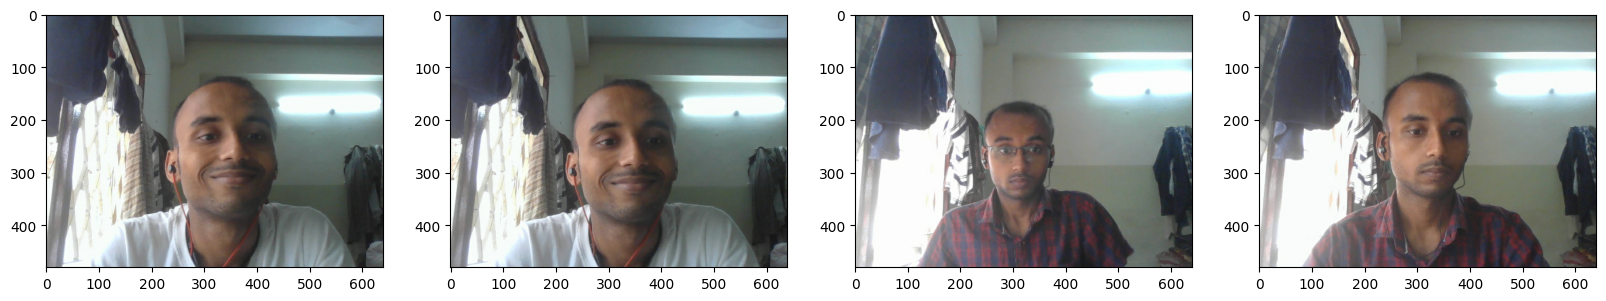

In [18]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

### 3.1 Manually split the data into train, test, and val

In [19]:
len(images)

150

In [21]:
150*0.7 # 98 to train

105.0

In [23]:
105 + 22.5 - 150

-22.5

In [22]:
150 * 0.15 # 21 test and 

22.5

In [24]:
image_dir = 'data/images'
img_list = os.listdir(image_dir)
img_list[:15]

['04deabae-47e5-11ee-be2b-f889d2634bd4.jpg',
 '05362e9a-47e5-11ee-aef1-f889d2634bd4.jpg',
 '058598b2-47e5-11ee-bcd6-f889d2634bd4.jpg',
 '05d56ec3-47e5-11ee-8a83-f889d2634bd4.jpg',
 '06256f0a-47e5-11ee-955a-f889d2634bd4.jpg',
 '06747f93-47e5-11ee-8cee-f889d2634bd4.jpg',
 '06c60afc-47e5-11ee-9ed0-f889d2634bd4.jpg',
 '07150dc8-47e5-11ee-a133-f889d2634bd4.jpg',
 '0763d82d-47e5-11ee-8437-f889d2634bd4.jpg',
 '07b28d6b-47e5-11ee-9afa-f889d2634bd4.jpg',
 '080112a6-47e5-11ee-9985-f889d2634bd4.jpg',
 '084fda5f-47e5-11ee-83b7-f889d2634bd4.jpg',
 '089e71dd-47e5-11ee-8276-f889d2634bd4.jpg',
 '08ed4452-47e5-11ee-be87-f889d2634bd4.jpg',
 '093b8a28-47e5-11ee-8be4-f889d2634bd4.jpg']

##### For train I am selecting 90 images from the datasets

In [25]:
# directory
image_dir = 'data/images'
img_dest = 'data/train/images'

img_list = os.listdir(image_dir)
num_img = 105
selected_images = random.sample(img_list, num_img)

# Copy the selected images
for img in selected_images:
    image_path = os.path.join(image_dir, img)
    dest_path = os.path.join(img_dest, img)
    shutil.move(image_path, dest_path)

In [26]:
# Testing Images and Validation I will put 21 images
image_dir = 'data/images'
val_img_dest = 'data/val/images'
num_img = 22
img_list = os.listdir(image_dir)
selected_images = random.sample(img_list, num_img)

# Move the selected images
for img in selected_images:
    image_path = os.path.join(image_dir, img)
    dest_path = os.path.join(val_img_dest, img)
    shutil.move(image_path, dest_path)

In [27]:
image_dir = 'data/images'
test_img_dest = 'data/test/images'
img_list = os.listdir(image_dir)
num_img =23
# selected_images = random.sample(img_list, num_img)
for img in img_list:
    image_path = os.path.join(image_dir, img)
    dest_path = os.path.join(test_img_dest, img)
    shutil.move(image_path, dest_path)

### 3.2 Move the Matching Labels

In [28]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

## 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [29]:
import albumentations as alb

In [30]:
augmentor = alb.Compose([
    alb.RandomCrop(width =450, height =450),
    alb.HorizontalFlip(p =0.5),
    alb.RandomBrightnessContrast(p =0.2),
    alb.RandomGamma(p =0.2),
    alb.RGBShift(p =0.2),
    alb.VerticalFlip(p =0.5),],
    keypoint_params= alb.KeypointParams(format = 'xy',
                                       label_fields= ['class_labels'])
)

### 4.2 Load a Test Image  and Annotation with OpenCV and  JSON

In [31]:
img = cv2.imread(os.path.join('data', 'train', 'images', '06747f93-47e5-11ee-8cee-f889d2634bd4.jpg'))

In [32]:
img

array([[[ 91,  85,  66],
        [ 91,  85,  66],
        [ 95,  84,  70],
        ...,
        [107, 106, 102],
        [106, 105, 101],
        [105, 104, 100]],

       [[ 96,  89,  72],
        [ 93,  86,  69],
        [ 90,  81,  67],
        ...,
        [105, 104, 100],
        [105, 104, 100],
        [105, 104, 100]],

       [[ 93,  87,  74],
        [ 94,  86,  73],
        [ 93,  83,  73],
        ...,
        [105, 105,  99],
        [105, 104, 100],
        [105, 104, 100]],

       ...,

       [[199, 200, 204],
        [205, 206, 210],
        [197, 198, 202],
        ...,
        [ 56,  57,  61],
        [ 39,  41,  42],
        [ 43,  45,  46]],

       [[203, 204, 208],
        [206, 207, 211],
        [195, 195, 201],
        ...,
        [ 54,  50,  61],
        [ 43,  40,  49],
        [ 46,  43,  52]],

       [[198, 199, 203],
        [202, 203, 207],
        [193, 193, 199],
        ...,
        [ 46,  39,  52],
        [ 48,  41,  54],
        [ 48,  41,  54]]

In [35]:
with open(os.path.join('data', 'train', 'labels', '06747f93-47e5-11ee-8cee-f889d2634bd4.json'), 'r') as f:
    label = json.load(f)

In [ ]:
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[3] = label['l'][0]['points'][0][0]
coords[4] = label['shapes'][0]['points'][0][1]

In [57]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'LeftEye',
   'points': [[289.5530726256983, 231.0614525139665]],
   'group_id': None,
   'description': '',
   'shape_type': 'point',
   'flags': {}},
  {'label': 'RightEye',
   'points': [[361.0614525139664, 228.8268156424581]],
   'group_id': None,
   'description': '',
   'shape_type': 'point',
   'flags': {}}],
 'imagePath': '..\\images\\06747f93-47e5-11ee-8cee-f889d2634bd4.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEB

In [37]:
type(label)

dict

In [38]:
label['shapes']

[{'label': 'LeftEye',
  'points': [[289.5530726256983, 231.0614525139665]],
  'group_id': None,
  'description': '',
  'shape_type': 'point',
  'flags': {}},
 {'label': 'RightEye',
  'points': [[361.0614525139664, 228.8268156424581]],
  'group_id': None,
  'description': '',
  'shape_type': 'point',
  'flags': {}}]

In [39]:
label['shapes'][0]

{'label': 'LeftEye',
 'points': [[289.5530726256983, 231.0614525139665]],
 'group_id': None,
 'description': '',
 'shape_type': 'point',
 'flags': {}}

In [87]:
label['shapes'][1]

{'label': 'RightEye',
 'points': [[361.0614525139664, 228.8268156424581]],
 'group_id': None,
 'description': '',
 'shape_type': 'point',
 'flags': {}}

In [40]:
label['shapes'][0]['label']

'LeftEye'

In [41]:
label['shapes'][0]['points']

[[289.5530726256983, 231.0614525139665]]

#### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
label[]

In [68]:
label['shapes']

[{'label': 'LeftEye',
  'points': [[289.5530726256983, 231.0614525139665]],
  'group_id': None,
  'description': '',
  'shape_type': 'point',
  'flags': {}},
 {'label': 'RightEye',
  'points': [[361.0614525139664, 228.8268156424581]],
  'group_id': None,
  'description': '',
  'shape_type': 'point',
  'flags': {}}]

In [69]:
label['shapes'][0]['points'][0][0]

289.5530726256983

In [70]:
label['shapes'][0]['points'][0][1]

231.0614525139665

In [80]:
label['shapes'][1]['points'][0][0]

361.0614525139664

In [81]:
label['shapes'][1]['points'][0][1]

228.8268156424581

In [83]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][1]['points'][0][0]
coords[3] = label['shapes'][1]['points'][0][1]

In [84]:
coords

[289.5530726256983, 231.0614525139665, 361.0614525139664, 228.8268156424581]

#### 4.4 Apply augmantaion and reviews

In [ ]:
augmentor = alb.Compose([
    alb.RandomCrop(width =450, height =450),
    alb.HorizontalFlip(p =0.5),
    alb.RandomBrightnessContrast(p =0.2),
    alb.RandomGamma(p =0.2),
    alb.RGBShift(p =0.2),
    alb.VerticalFlip(p =0.5),],
    keypoint_params= alb.KeypointParams(format = 'xy',
                                       label_fields= ['class_labels'])

In [85]:
coords

[289.5530726256983, 231.0614525139665, 361.0614525139664, 228.8268156424581]

In [91]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [92]:
coords

[0.45242667597765357,
 0.4813780260707635,
 0.5641585195530725,
 0.4767225325884544]

#### Apply augmantaion and view results

In [94]:
label.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [110]:
keypoints = [(coords[:2]), (coords[2:])]

In [111]:
augmented = augmentor(image =img, keypoints  = keypoints, class_labels = ['LeftEye', 'RightEye'])

In [115]:
augmented

{'image': array([[[119, 118, 114],
         [101, 100,  96],
         [102, 101,  97],
         ...,
         [138, 139, 129],
         [139, 140, 130],
         [137, 141, 130]],
 
        [[110, 108, 107],
         [ 97,  98,  96],
         [101, 102, 100],
         ...,
         [139, 140, 130],
         [139, 140, 130],
         [139, 140, 130]],
 
        [[113, 111, 110],
         [101, 102, 100],
         [102, 103, 101],
         ...,
         [139, 140, 130],
         [139, 140, 130],
         [140, 141, 131]],
 
        ...,
 
        [[205, 205, 205],
         [211, 211, 211],
         [209, 209, 209],
         ...,
         [ 35,  33,  54],
         [ 40,  36,  63],
         [ 43,  35,  70]],
 
        [[209, 209, 209],
         [212, 212, 212],
         [208, 208, 208],
         ...,
         [ 36,  34,  55],
         [ 40,  35,  65],
         [ 43,  35,  70]],
 
        [[212, 212, 212],
         [212, 212, 212],
         [211, 211, 211],
         ...,
         [ 36,  31,

In [113]:
augmented['keypoints']

[]

## 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmantation pipelines

In [117]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        classes = [0, 0]
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            if label['shapes'][0]['label'] == 'LeftEye':
                classes[0] = 1
                coords[0] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[1] = np.squeeze(label['shapes'][0]['points'])[1]
                
            if label['shapes'][0]['label'] == 'RightEye':
                classes[1] = 1
                coords[2] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[3] = np.squeeze(label['shapes'][0]['points'])[1]
                
            if len(label['shapes']) > 1:
                if label['shapes'][1]['label'] == 'LeftEye':
                    classes[0] = 1
                    coords[0] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[1] = np.squeeze(label['shapes'][1]['points'])[1]
                    
                if label['shapes'][1]['label'] == 'RightEye':
                    classes[1] =1
                    coords[2] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[3] = np.squeeze(label['shapes'][1]['points'])[1]
                    
                    
            np.divide(coords, [640, 480, 640, 480])
            
        try:
            for x in range(120):
                keypoints = [(coords[:2]), (coords[2:])]
                augmented = augmentor(image =img, keypoints = keypoints, class_labels = ['LeftEye', 'RightEye'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                
                
                annotation = {}
                annotation['image'] = image
                annotation['class'] = [0,0]
                annotation['keypoints'] = [0, 0, 0, 0]
                
                if os.path.exists(label_path):
                    if len(augmented['keypoints']) > 0:
                        for idx, cl in enumerate(augmented['class_labels']):
                            if cl == 'LeftEye':
                                annotation['class'][0] = 1
                                annotation['keypoints'][0] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][1] = augmented['keypoints'][idx][1]
                            if cl == 'RightEye':
                                annotation['class'][1] = 1
                                annotation['keypoints'][2] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][3] = augmented['keypoints'][idx][1]
                annotation['keypoints'] = list(np.divide(annotation['keypoints'], [450, 450, 450, 450]))
                
                
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
                    
        except Exception as e:
            print(e)